# Pymaceuticals Inc.
---

### Analysis

- The bar graph we created after cleaning up our combined data showed us that the # of Observed Mouse Timepoints was highest with the drug regimen Capomulin and the lowest with Propriva.
- The correlation between mouse weight and the average tumor volume is 0.84 which means it is a strong positive correlation, that signifies when the average mouse weight increases so does the average tumor volume.
- The regression analysis shows an R-squared value of .70 or 70% which is fairly good to predict future outcomes.


In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
# need to import linregress to plot correlation and regression graph
from scipy.stats import linregress

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
combined_data = pd.merge(study_results, mouse_metadata, how= 'left', on = "Mouse ID")

# Display the data table for preview
combined_data.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [2]:
# Checking the number of mice.
combined_data['Mouse ID'].nunique()

249

In [3]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicate_df = combined_data[combined_data.duplicated(subset=['Mouse ID','Timepoint'],keep=False)]
duplicate_df['Mouse ID'].unique()

array(['g989'], dtype=object)

In [4]:
# Optional: Get all the data for the duplicate mouse ID. 
duplicate_df

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
107,g989,0,45.000000,0,Propriva,Female,21,26
137,g989,0,45.000000,0,Propriva,Female,21,26
329,g989,5,48.786801,0,Propriva,Female,21,26
360,g989,5,47.570392,0,Propriva,Female,21,26
620,g989,10,51.745156,0,Propriva,Female,21,26
681,g989,10,49.880528,0,Propriva,Female,21,26
815,g989,15,51.325852,1,Propriva,Female,21,26
869,g989,15,53.442020,0,Propriva,Female,21,26
950,g989,20,55.326122,1,Propriva,Female,21,26
1111,g989,20,54.657650,1,Propriva,Female,21,26


In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
cleaned_df = combined_data.loc[combined_data['Mouse ID'] !='g989']
cleaned_df.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [6]:
# Checking the number of mice in the clean DataFrame.
cleaned_df['Mouse ID'].nunique()

248

## Summary Statistics

In [7]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary DataFrame.
mean_tumor = cleaned_df.groupby('Drug Regimen')["Tumor Volume (mm3)"].mean()
median_tumor = cleaned_df.groupby('Drug Regimen')["Tumor Volume (mm3)"].median()
variance_tumor = cleaned_df.groupby('Drug Regimen')["Tumor Volume (mm3)"].var()
st_dev_tumor = cleaned_df.groupby('Drug Regimen')["Tumor Volume (mm3)"].std()
sem_tumor = cleaned_df.groupby('Drug Regimen')["Tumor Volume (mm3)"].sem()

summary_df = pd.DataFrame({
    "Mean Tumor Volume": mean_tumor,
    "Median Tumor Volume": median_tumor,
    "Tumor Volume Variance": variance_tumor,
    "Tumor Volume Std. Dev": st_dev_tumor,
    "Tumor Volume Std. Err.": sem_tumor
})

summary_df

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [8]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

# Using the aggregation method, produce the same summary statistics in a single line
summary2_df = cleaned_df.groupby('Drug Regimen').aggregate({'Tumor Volume (mm3)': ['mean', 'median', 'var', 'std', 'sem']})

summary2_df

Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

Text(0, 0.5, '# of Observed Mouse Timepoints')

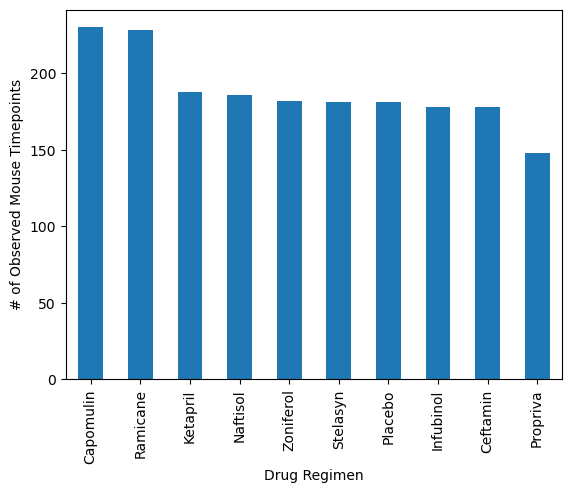

In [9]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
drug_chart_bar = cleaned_df['Drug Regimen'].value_counts()
drug_chart_bar.plot.bar(x="Drug Regimen", y="# of Observed Mouse Timepoints", rot= 90)
plt.xlabel('Drug Regimen')
plt.ylabel('# of Observed Mouse Timepoints')
                    

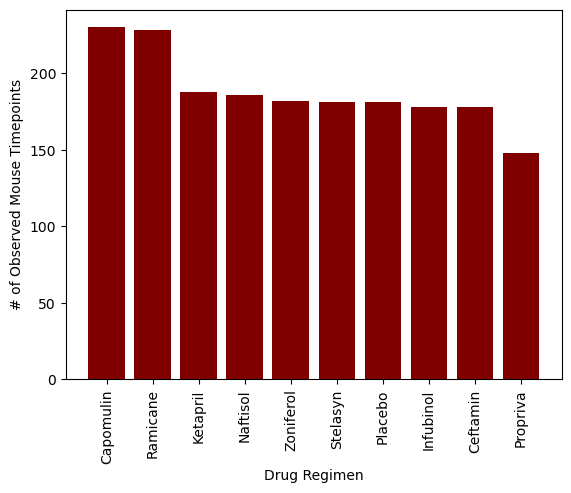

In [10]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
x= drug_chart_bar.index
y=drug_chart_bar.values
plt.bar(x,y, color= 'maroon')
plt.xlabel('Drug Regimen')
plt.ylabel('# of Observed Mouse Timepoints')
plt.xticks(rotation= 90)
plt.show()

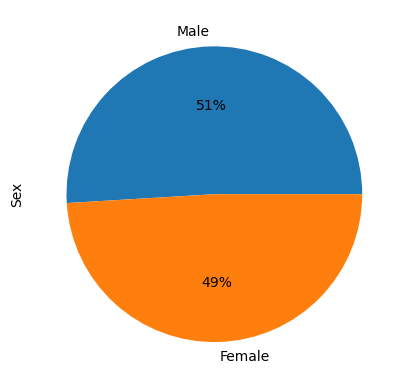

In [11]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
gender_pie_chart = cleaned_df["Sex"].value_counts()
gender_pie_chart.plot(kind='pie', autopct= '%1.0f%%')
plt.ylabel('Sex')
plt.show()

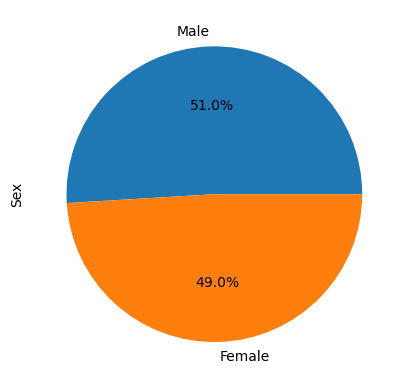

In [12]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
values = gender_pie_chart.values
labels=  gender_pie_chart.index
plt.pie(values, labels=labels, autopct='%.1f%%')
plt.ylabel('Sex')
plt.show()

## Quartiles, Outliers and Boxplots

In [13]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin


# Start by getting the last (greatest) timepoint for each mouse
max_df = cleaned_df.groupby('Mouse ID')[['Timepoint']].max().reset_index()
max_df

# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
merged_data_df = pd.merge(max_df, cleaned_df, how = 'left', on= ['Mouse ID','Timepoint'])


In [14]:
# Put treatments into a list for for loop (and later for plot labels)
drug_list = ['Capomulin', 'Ramicane', 'Infubinol','Ceftamin']


# Create empty list to fill with tumor vol data (for plotting)

tumor_vol=[]

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
for drug in drug_list:
    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    tumors= merged_data_df.loc[merged_data_df['Drug Regimen'] == drug, 'Tumor Volume (mm3)']
    
    # add subset 
    tumor_vol.append(tumors)
    
    # Determine outliers using upper and lower bounds
    quartiles = tumors.quantile([.25,.5,.75])
    lowerq = quartiles[.25]
    upperq = quartiles[.75]
    iqr = upperq-lowerq

    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)
    outliers= tumors.loc[(tumors < lower_bound) | (tumors > upper_bound)]

    print(f'{drug} outliers:{outliers}')


Capomulin outliers:Series([], Name: Tumor Volume (mm3), dtype: float64)
Ramicane outliers:Series([], Name: Tumor Volume (mm3), dtype: float64)
Infubinol outliers:31    36.321346
Name: Tumor Volume (mm3), dtype: float64
Ceftamin outliers:Series([], Name: Tumor Volume (mm3), dtype: float64)


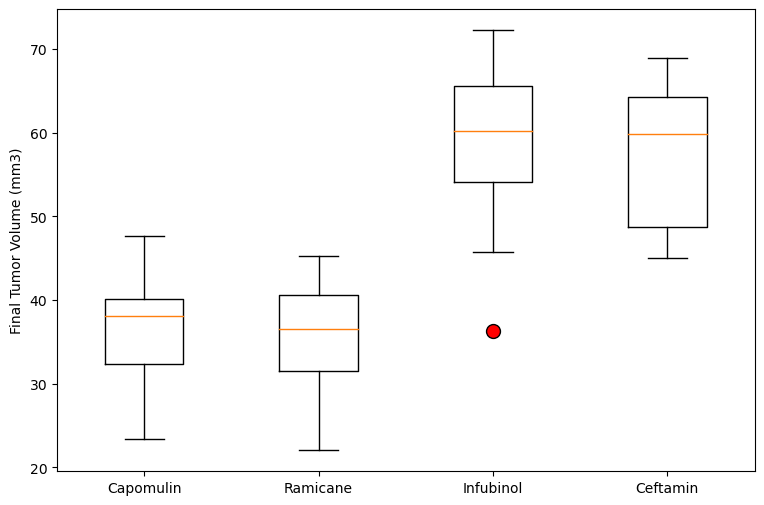

In [15]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.
fig, ax= plt.subplots(1, figsize=(9,6))
box_plot = ax.boxplot(tumor_vol)
ax.set_ylabel('Final Tumor Volume (mm3)')
ax.set_xticklabels(drug_list)
for flier in box_plot['fliers']:
    flier.set(marker='o', markersize=10, markerfacecolor = 'red', alpha =1)
    
plt.show()

## Line and Scatter Plots

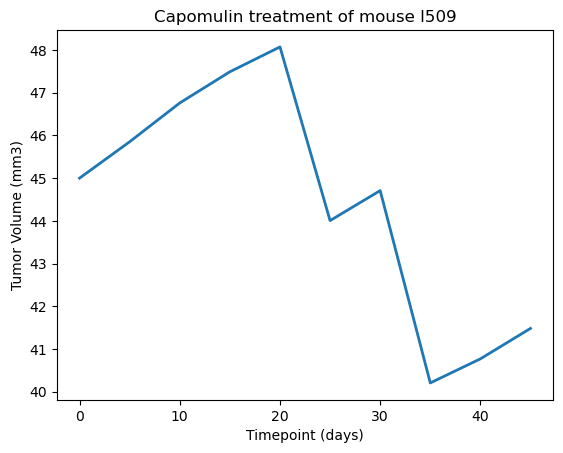

In [16]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
capomulin_df = cleaned_df.loc[cleaned_df["Drug Regimen"] == "Capomulin", :]
single_mouse = capomulin_df.loc[capomulin_df['Mouse ID'] == 'l509',:]
x_axis = single_mouse['Timepoint']
y_axis = single_mouse['Tumor Volume (mm3)']


plt.title('Capomulin treatment of mouse l509')
plt.plot(x_axis, y_axis, linewidth= 2)
plt.xlabel('Timepoint (days)')
plt.ylabel('Tumor Volume (mm3)')
plt.show()

C:\Users\caval\AppData\Local\Temp\ipykernel_24080\3115410408.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  average_volume = capomulin_df.groupby(["Mouse ID"]).mean()


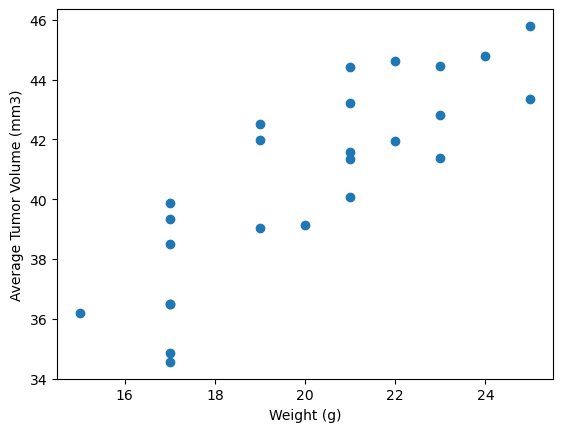

In [17]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen
average_volume = capomulin_df.groupby(["Mouse ID"]).mean()

plt.scatter(average_volume['Weight (g)'], average_volume['Tumor Volume (mm3)'])
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')

plt.show()

## Correlation and Regression

The correlation between mouse weight and the average tumor volume is 0.84
The r-squared is :0.7088568047708723


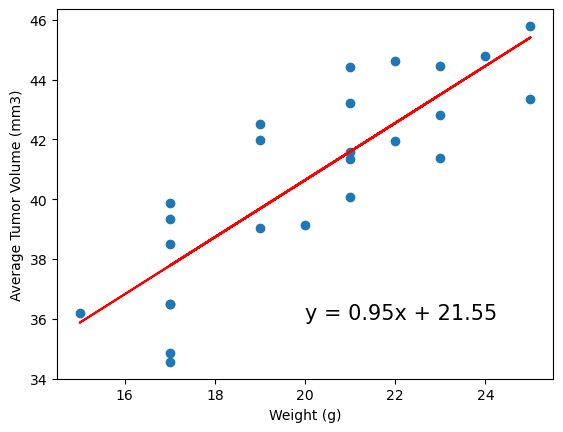

In [18]:
# Calculate the correlation coefficient and a linear regression model 
# for mouse weight and average observed tumor volume for the entire Capomulin regimen
correlation = st.pearsonr(average_volume['Weight (g)'], average_volume['Tumor Volume (mm3)'])
print(f'The correlation between mouse weight and the average tumor volume is {round(correlation[0],2)}')

(slope, intercept, rvalue, pvalue, stderr) = linregress(average_volume['Weight (g)'],average_volume['Tumor Volume (mm3)'])
regress_values = average_volume['Weight (g)'] * slope + intercept
line_eq = "y = " + str(round(slope, 2)) + "x + " + str(round(intercept,2))

plt.scatter(average_volume['Weight (g)'], average_volume['Tumor Volume (mm3)'])
plt.plot(average_volume['Weight (g)'], regress_values,"r-")
plt.annotate(line_eq,(20,36), fontsize=15)
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
print(f'The r-squared is :{rvalue**2}')
plt.show()